<a href="https://colab.research.google.com/github/rkbono/GLY4451/blob/main/GLY4451_Lab_Lecture_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's get some basic modules imported
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image 
import os

In [2]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    !git clone https://github.com/rkbono/GLY4451.git
    !pip install cartopy
    fpath = './GLY4451/'
else:
    print('Not running on CoLab')
    fpath = './'

Not running on CoLab


# Lecture 8ish

- better loops
- list comprehension
- lambda functions
- map plots

## Better loops

Python loops have more options built in than other languages. Two I'd like to highlight are **enumerate** and **zip**.<br>

### Enumerate
Using the **enumerate()** function on your iterable will return two values, the element index and then the element value.<br>You can use this to keep track of indices while directly interacting with list values at the same time.

In [3]:
xx = np.random.randint(0,100+1e-5,size=15)
print(xx)

[94 91 81 95 54 75 94 30 89 15 63 16 32 81 26]


In [4]:
for idx,val in enumerate(xx):
    print(idx,val)

0 94
1 91
2 81
3 95
4 54
5 75
6 94
7 30
8 89
9 15
10 63
11 16
12 32
13 81
14 26


Note this is essentially the same as this:

In [5]:
for idx in range(len(xx)):
    print(idx,xx[idx])

0 94
1 91
2 81
3 95
4 54
5 75
6 94
7 30
8 89
9 15
10 63
11 16
12 32
13 81
14 26


or this:

In [6]:
idx = 0
for val in xx:
    print(idx,val)
    idx += 1

0 94
1 91
2 81
3 95
4 54
5 75
6 94
7 30
8 89
9 15
10 63
11 16
12 32
13 81
14 26


### Zip
The **zip()** function returns an iterator of tuples based on the iterable objects.

If we do not pass any parameter, **zip()** returns an empty iterator
If a single iterable is passed, **zip()** returns an iterator of tuples with each tuple having only one element.
If multiple iterables are passed, **zip()** returns an iterator of tuples with each tuple having elements from all the iterables.

Suppose, two iterables are passed to **zip()**; one iterable containing three and other containing five elements. Then, the returned iterator will contain three tuples. It's because the iterator stops when the shortest iterable is exhausted.

In [7]:
yy = np.random.randint(100,200+1e-5,size=15)

for x,y in zip(xx,yy):
    print('%d + %d = %d'%(x,y,x+y))

94 + 107 = 201
91 + 114 = 205
81 + 166 = 247
95 + 125 = 220
54 + 198 = 252
75 + 125 = 200
94 + 175 = 269
30 + 193 = 223
89 + 187 = 276
15 + 106 = 121
63 + 183 = 246
16 + 155 = 171
32 + 192 = 224
81 + 102 = 183
26 + 168 = 194


Any iterable can be **enumerate**d, including zip objects:

In [8]:
for idx,(x,y) in enumerate(zip(xx,yy)):
    print(idx,x+y)

0 201
1 205
2 247
3 220
4 252
5 200
6 269
7 223
8 276
9 121
10 246
11 171
12 224
13 183
14 194


## List comprehension

A succinct way to iterate over sequences and apply different operations, is through List, Dictionary, and Set comprehensions.

A List comprehension is a convenient way of applying an operation to a collection of objects.  It takes this basic form:

\[**expression for** element **in** collection **if** condition\]

### Example 1:
Square each element in a list of numbers.

In [9]:
[x**2 for x in xx]

[8836,
 8281,
 6561,
 9025,
 2916,
 5625,
 8836,
 900,
 7921,
 225,
 3969,
 256,
 1024,
 6561,
 676]

### Example 2:
Display each **odd** element in a list of numbers.

In [10]:
[x for x in xx if x%2==1]

[91, 81, 95, 75, 89, 15, 63, 81]

### Example 3:
You can apply conditionals to each returned element.<br>
Syntax is a little tricky:<br>
[expression when true **if** condition **else** expression when false **for** element **in** collection]<br>
Print 'odd' or 'even' for each element in a list.

In [11]:
[(x,'odd') if x%2==1 else (x,'even') for x in xx]

[(94, 'even'),
 (91, 'odd'),
 (81, 'odd'),
 (95, 'odd'),
 (54, 'even'),
 (75, 'odd'),
 (94, 'even'),
 (30, 'even'),
 (89, 'odd'),
 (15, 'odd'),
 (63, 'odd'),
 (16, 'even'),
 (32, 'even'),
 (81, 'odd'),
 (26, 'even')]

### Example 4a:
List comprehension can be nested<br>
Again, syntax is a little tricky:<br>
[elem2 **for** elem1 **in** collection **for** elem2 **in** elem1]
<br><br>
One thing we can do is "flatten" a list of lists into a single list.

In [12]:
[item for sublist in [xx,yy] for item in sublist]

[94,
 91,
 81,
 95,
 54,
 75,
 94,
 30,
 89,
 15,
 63,
 16,
 32,
 81,
 26,
 107,
 114,
 166,
 125,
 198,
 125,
 175,
 193,
 187,
 106,
 183,
 155,
 192,
 102,
 168]

### Example 4b:
See if you can unpack the following nested list comprehension

In [13]:
[(x,y,z) for x in range(1,30) \
    for y in range(x,30) for z in range(y,30) \
    if x**2 + y**2 == z**2]

[(3, 4, 5),
 (5, 12, 13),
 (6, 8, 10),
 (7, 24, 25),
 (8, 15, 17),
 (9, 12, 15),
 (10, 24, 26),
 (12, 16, 20),
 (15, 20, 25),
 (20, 21, 29)]

## Dictionary and Set Comprehension
Sets and dictionaries can also work using the "comprehension" syntax. This is especially useful when paired with zip to make dictionaries from data.<br>

Set comprehension works exactly like list comprehension, except {} are used.<br>

Dictionary comprehension works using the following syntax:<br>

{key:val **for** elem **in** collection}

In [14]:
abc = 'abcdefghijklmnopqrstuvwxyz'

temp_dictionary = {kk:vv for (kk,vv) in zip(abc,xx)}
temp_dictionary

{'a': 94,
 'b': 91,
 'c': 81,
 'd': 95,
 'e': 54,
 'f': 75,
 'g': 94,
 'h': 30,
 'i': 89,
 'j': 15,
 'k': 63,
 'l': 16,
 'm': 32,
 'n': 81,
 'o': 26}

# Lambda functions

You can spell any Greek letter and use it as a variable name EXCEPT for **lambda**. As we learned in Lecture 2, **lambda** is a _reserved word_.   Why?  Because **lambda** has a special meaning in Python; it is reserved for _anonymous functions_.

The syntax of a **lambda** function consists of  a **name =**, followed by  the word **lambda** followed by an _argument list_, a colon (:), and ending with  an _expression_.  Here is a simple example of an anonymous function that returns the product of the argument list: 

In [15]:
f=lambda x,y : x*y

Let's dissect the statement. 

- **f** is a new kind of  object that represents the function,

- $x$ and $y$ are the arguments of the anonymous function, 

- and the expression $x*y$ is what is returned when the function is called. 

We're familiar with the following syntax for a "normal" function:

In [16]:
def g(x, y):
    return x*y

Both $f$ and $g$ take the same arguments and return the same value. They are essentially the same function.  

Let us verify this, by calling both functions with the arguments $x=2$ and $y=10$:

In [17]:
print (f(2,10))
print (g(2,10))

20
20


**lambda** functions should seem familiar. They follow the same syntax you use in math to define functions:

f(x) = x<sup>2</sup> +5x + 9 
 
So we could easily write this as a **lambda** function like this:  


 


In [18]:
h = lambda x: x**2+5.*x+9


For a multivariate function (one with more than one argument), you need to list all the arguments after the reserved word **lambda**. For example, 
In math, you’d write the equation for the hypotenus of two sides,  $a $ and $b$,  as: 
 
hypotenus($a$, $b$) = $\sqrt{a^2+ b^2}$.

In Python it would be:


In [19]:
hypotenus = lambda a, b:  np.sqrt(a**2+b**2)
print (hypotenus(3,4))

5.0


# Heat flow examples
## Geotherms

In [20]:
import scipy as sp
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def geotherm(z,d,k,qd,a):
    """
    returns temp at depth (z) given thickness (d), conductivity (k), basal heat (qd) and internal heat (a)
    """
    
    return -(a/(2*k))*(z**2) + ((qd+(a*d))/(k))*z

In [22]:
zz = np.linspace(0,60e3,100) # 100 m steps up to 60 km

In [23]:
case_A = {'id':'A', 'd':50e3, 'k':2.5, 'a':1.25e-6, 'qd':21e-3}
case_B = {'id':'B', 'd':50e3, 'k':1.7, 'a':1.25e-6, 'qd':21e-3}
case_C = {'id':'C', 'd':50e3, 'k':2.5, 'a':2.50e-6, 'qd':21e-3}
case_D = {'id':'D', 'd':50e3, 'k':2.5, 'a':1.25e-6, 'qd':42e-3}
case_E = {'id':'E', 'd':50e3, 'k':2.5, 'a':1.25e-6, 'qd':10.5e-3}
cases = [case_A, case_B, case_C, case_D, case_E]

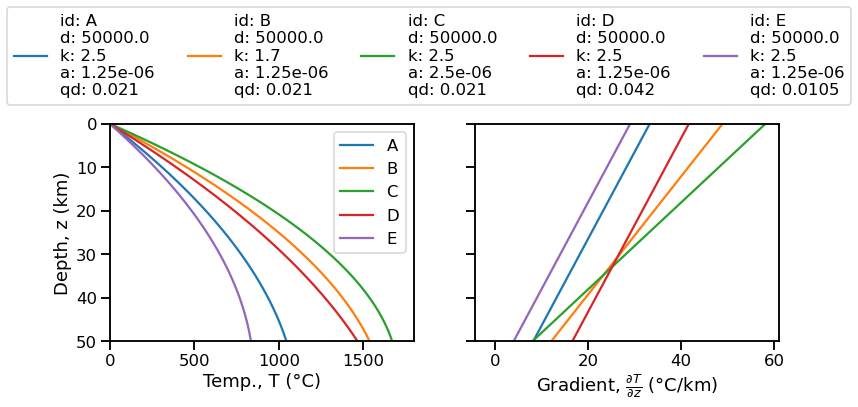

In [24]:
sns.set_context('talk')

fig = plt.figure(figsize=(12,4))
ax = fig.subplots(1,2,sharey=True)

for case in cases:
    ax[0].plot(geotherm(zz,case['d'],case['k'],case['qd'],case['a']),zz/1e3,'-',label=case['id'])
    ax[1].plot(1e3*np.diff(geotherm(zz,case['d'],case['k'],case['qd'],case['a']))/np.diff(zz),zz[:-1]/1e3,'-',
               label='\n'.join([('%s: %s')%(key,val) for key,val in case.items()])
              )

ax[0].set_ylabel('Depth, z (km)')
    
ax[0].set_xlabel('Temp., T (°C)')
ax[1].set_xlabel(r'Gradient, $\frac{\partial{T}}{\partial{z}}$ (°C/km)')
    
ax[0].legend()
ax[1].legend(bbox_to_anchor=(-0.15,1.05),loc='lower center',ncol=len(cases))


[aa.set_ylim([50,0]) for aa in ax.flat]
ax[0].set_xlim([0,1800]);

## 2 layer geotherm

In [25]:
def geotherm_twolayer(z,z1,z2,k,qd,a1,a2):
    """
    returns temp at depth (z) given thickness (d), conductivity (k), basal heat (qd) and internal heat (a)
    """
    
    if z<z1:
        return -a1/(2*k)*z**2 + (qd/k + (a2/k)*(z2-z1) + (a1*z1)/k)*z
    else:
        return -a2/(2*k)*z**2 + (qd/k + (a2*z2/k))*z + (a1-a2)/(2*k)*z1**2

In [26]:
case2_A = {'id':'A', 'z1':20e3, 'z2':15e3, 'k':2.5, 'qd':63e-3, 'a1': 4.2e-6, 'a2': 0.8e-6}

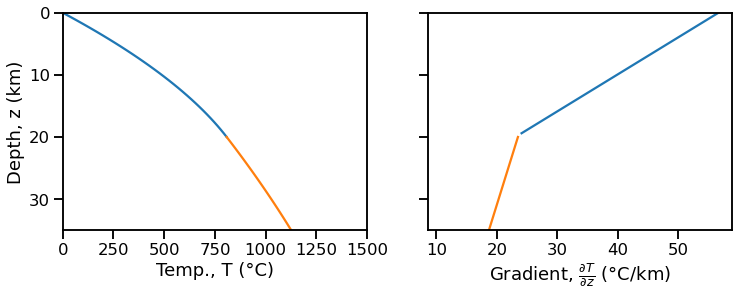

In [27]:
fig = plt.figure(figsize=(12,4))
ax = fig.subplots(1,2,sharey=True)

ax[0].plot([geotherm_twolayer(z,
                           case2_A['z1'],case2_A['z2'],
                           case2_A['k'],case2_A['qd'],
                           case2_A['a1'],case2_A['a2']) for z in zz[zz<=case2_A['z1']]],
        zz[zz<=case2_A['z1']]/1e3,'-')

ax[0].plot([geotherm_twolayer(z,
                           case2_A['z1'],case2_A['z2'],
                           case2_A['k'],case2_A['qd'],
                           case2_A['a1'],case2_A['a2']) for z in zz[zz>=case2_A['z1']]],
        zz[zz>=case2_A['z1']]/1e3,'-')

############

ax[1].plot(np.diff([1e3*geotherm_twolayer(z,case2_A['z1'],case2_A['z2'],
                                      case2_A['k'],case2_A['qd'],
                                      case2_A['a1'],
                                      case2_A['a2']) for z in zz[zz<=case2_A['z1']]])/np.diff(zz[zz<=case2_A['z1']]),
        zz[zz<=case2_A['z1']][:-1]/1e3,'-',color='tab:blue')

ax[1].plot(np.diff([1e3*geotherm_twolayer(z,case2_A['z1'],case2_A['z2'],
                                      case2_A['k'],case2_A['qd'],
                                      case2_A['a1'],
                                      case2_A['a2']) for z in zz[zz>=case2_A['z1']]])/np.diff(zz[zz>=case2_A['z1']]),
        zz[zz>=case2_A['z1']][:-1]/1e3,'-',color='tab:orange')

###########

ax[0].set_ylim([(case2_A['z1']+case2_A['z2'])/1e3,0])
ax[0].set_xlim([0,1500])

ax[0].set_ylabel('Depth, z (km)')   
ax[0].set_xlabel('Temp., T (°C)')
ax[1].set_xlabel(r'Gradient, $\frac{\partial{T}}{\partial{z}}$ (°C/km)');


## Heating and cooling
Scenario: Dike of width 2w, no internal heat generation, initial temperature T0, ignore latent heat<br>
initial conditions:<br>i) T=T0 at t=0 for -w <= x <= w<br>ii) T=0 at t=0 for |x|>=w

In [28]:
def tempdist(x,t,w,t0,k):
    """
    return temperature (degC) at given distance (x) and time (t) for 
    emplaced dike of width 2w at initial temp t0 and diffusivity of k
    """
    return (t0/2)*(sp.special.erf((w-x)/(2*np.sqrt(k*t)))+sp.special.erf((w+x)/(2*np.sqrt(k*t))))

In [29]:
days = [dt.timedelta(days=t).total_seconds() for t in range(8)] # 1 week in days
weeks = [dt.timedelta(weeks=t).total_seconds() for t in range(1,53)] # 1 year in weeks
years = [dt.timedelta(days=t*365.25).total_seconds() for t in range(1,101)] # 100 years

/var/folders/1s/wjx12t_j5h7gnb2g26c4dv8h0000gn/T/ipykernel_36680/802089117.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return (t0/2)*(sp.special.erf((w-x)/(2*np.sqrt(k*t)))+sp.special.erf((w+x)/(2*np.sqrt(k*t))))


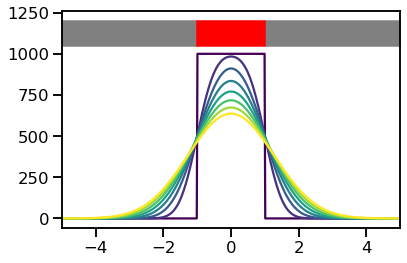

In [30]:
w = 1 # meter half-width
t0 = 1000 # initial temp
k = 1e-6 # diffusivity

xx = np.linspace(-10,10,1000)
cmap = plt.cm.viridis(np.linspace(0,1,len(days)))

fig = plt.figure()
ax = fig.subplots(1,1)

for tt,cc in zip(days,cmap):
    ax.plot(xx,tempdist(xx,tt,w,t0,k),'-',color=cc)

ax.set_xlim([-5,5])

# getting fancy
ax.fill_between(xx[(xx<-w)&(xx>ax.get_xlim()[0])],
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(t0+200),
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(t0+50),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>w)&(xx<ax.get_xlim()[1])],
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(t0+200),
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(t0+50),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>-w)&(xx<w)],
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(t0+200),
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(t0+50),
                 color='red', clip_on=True)


fig.tight_layout();

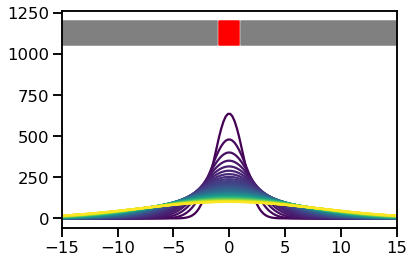

In [31]:
w = 1 # meter half-width
t0 = 1000 # initial temp
k = 1e-6 # diffusivity

xx = np.linspace(-100,100,1000)
cmap = plt.cm.viridis(np.linspace(0,1,len(weeks)))

fig = plt.figure()
ax = fig.subplots(1,1)

for tt,cc in zip(weeks,cmap):
    ax.plot(xx,tempdist(xx,tt,w,t0,k),'-',color=cc)
ax.set_xlim([-15,15])


# getting fancy
ax.fill_between(xx[(xx<-w)&(xx>ax.get_xlim()[0])],
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(t0+200),
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(t0+50),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>w)&(xx<ax.get_xlim()[1])],
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(t0+200),
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(t0+50),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>-w)&(xx<w)],
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(t0+200),
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(t0+50),
                 color='red', clip_on=True)

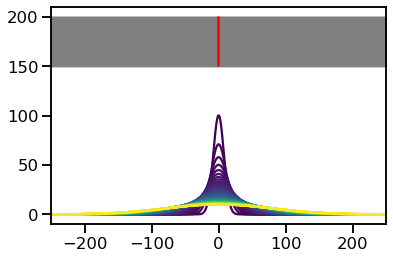

In [32]:
w = 1 # meter half-width
t0 = 1000 # initial temp
k = 1e-6 # diffusivity

xx = np.linspace(-250,250,10000)
cmap = plt.cm.viridis(np.linspace(0,1,len(years)))

fig = plt.figure()
ax = fig.subplots(1,1)

for tt,cc in zip(years,cmap):
    ax.plot(xx,tempdist(xx,tt,w,t0,k),'-',color=cc)
ax.set_xlim([-250,250])

# getting fancy
ax.fill_between(xx[(xx<-w)&(xx>ax.get_xlim()[0])],
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(200),
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(150),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>w)&(xx<ax.get_xlim()[1])],
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(200),
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(150),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>-w)&(xx<w)],
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(200),
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(150),
                 color='red', clip_on=True)

# Cartopy - making maps

Maps are fundamental to geology, but all maps are trying to achieve the impossible: depict a 3D object in two dimensions. Inevitably, some compromises in shape, angle, or area are required. We call these transformations "projections". Rectangular projections are particularly prone to distortion, but all map shapes involve some difference from reality.


**Cartopy** is a module for Python for making maps, replacing the matplotlib module **Basemap**. NB: this changeover happened about 5 years ago, so there are a lot of tutorials/guides/modules that have not yet been migrated to cartopy. 

*(An alternative to cartopy is **GMT**, Generic Mapping Tools, and it's python interface **pyGMT**. I really like GMT, it makes beautiful maps fast, but the learning curve is quite steep and is based on older, command-line-interface tools and arguments. Not for this class, but worth thinking about if you want to step up your map making in the future.)*

First step are importing the modules crs and feature from cartopy. CRS handles transforming provided locations (in lon, lat format typically) to map units. Feature includes many built geographic features commonly useful to plot.

In [33]:
from cartopy import feature as cfeature, crs as ccrs

Let's make our first map, something familiar using the PlateCarree projection -- an equirectangular projection similar to Mercator.

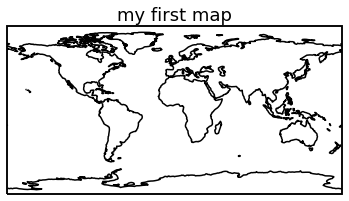

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree()) 
# note the added argument "projection" informing matplotlib to use the named projection

ax.set_title('my first map')

ax.coastlines() # draws coastlines

Let's use a different projection -- I like Mollweide and Robinson myself

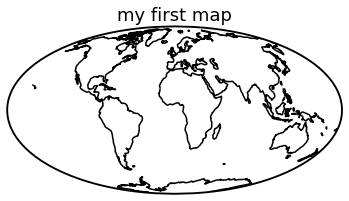

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide()) 
# note the added argument "projection" informing matplotlib to use the named projection

ax.set_title('my first map')

ax.coastlines() # draws coastlines

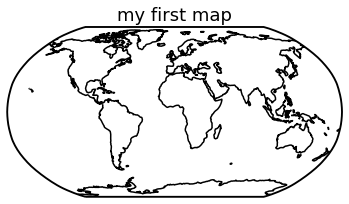

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson()) 
# note the added argument "projection" informing matplotlib to use the named projection

ax.set_title('my first map')

ax.coastlines() # draws coastlines

We can adjust the centering of the projection -- let's make North America in the center

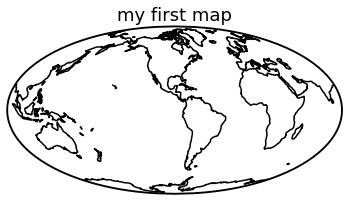

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide(central_longitude=-90)) 
# note the added argument "projection" informing matplotlib to use the named projection

ax.set_title('my first map')

ax.coastlines() # draws coastlines

Here's a comparison of how different projections affect how the map looks, using a Tissot indicatrix

/Users/rkbono/miniconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x131b5e630> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '
/Users/rkbono/miniconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x1318be3b0> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '
/Users/rkbono/miniconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x13171e590> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '
/Users/rkbono/miniconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x131648720> with the PlateCarr

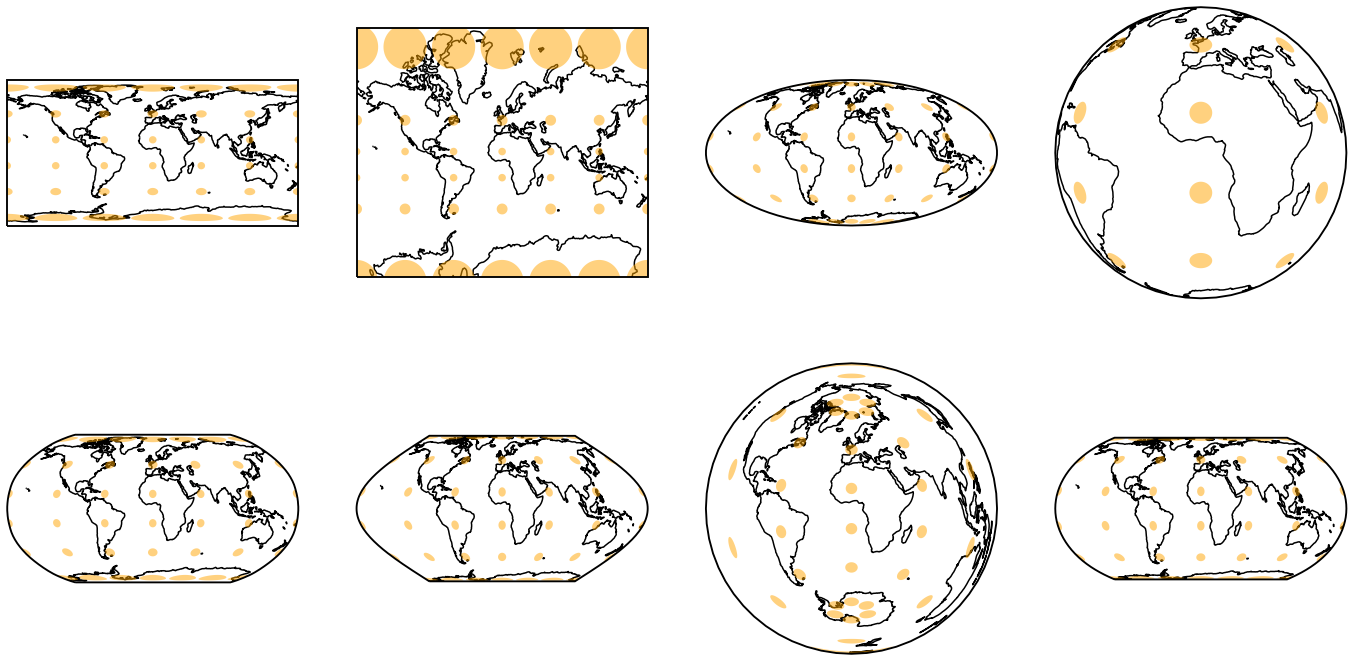

In [38]:
fig = plt.figure(figsize=(24,12))

projections = [ccrs.PlateCarree(),ccrs.Mercator(),ccrs.Mollweide(),
            ccrs.Orthographic(),ccrs.Robinson(),ccrs.EckertVI(),
            ccrs.LambertAzimuthalEqualArea(),ccrs.EqualEarth()]

for ii,proj in enumerate(projections):

    ax = fig.add_subplot(2,4,ii+1,projection=proj)
    ax.coastlines()
    ax.tissot(facecolor='orange',alpha=0.5);

We can use Cartopy features to add geographic info

/Users/rkbono/miniconda3/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


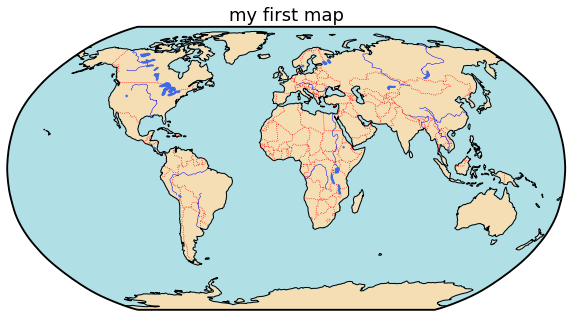

In [39]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson()) 
# note the added argument "projection" informing matplotlib to use the named projection

ax.set_title('my first map')

ax.add_feature(cfeature.COASTLINE,color='black',linewidth=1)
ax.add_feature(cfeature.BORDERS,color='red',linewidth=0.75,linestyle=':')
ax.add_feature(cfeature.RIVERS,color='blue',linewidth=0.5)
ax.add_feature(cfeature.LAKES,color='royalblue')
ax.add_feature(cfeature.LAND,color='wheat')
ax.add_feature(cfeature.OCEAN,color='powderblue')


We can plot data (point, lines, grids and polygons) on our maps.

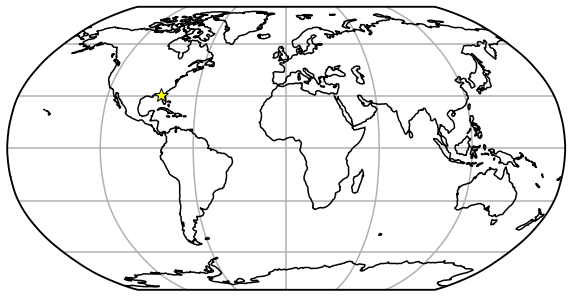

In [40]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson()) 
# note the added argument "projection" informing matplotlib to use the named projection

ax.set_global()
ax.coastlines()
ax.gridlines(zorder=0) # zorder controls the layering that features are drawn, with smaller numbers below larger ones

ax.plot(-84.3,30.5,marker='*',color='yellow',mec='k',markersize=15, transform=ccrs.PlateCarree())

Note that in the plot call, the new argument "transform", tells python that the data is in the PlateCarree reference frame.

Also remember that x=longitude and y=latitude!

Let's add a second point and draw a line connecting the two.

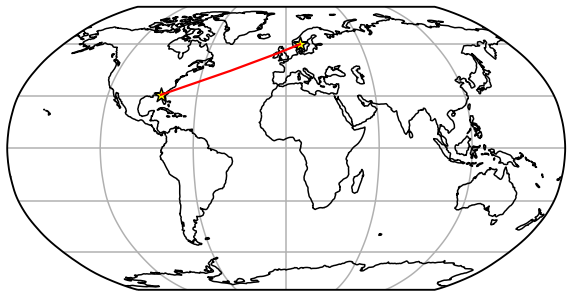

In [41]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson()) 
# note the added argument "projection" informing matplotlib to use the named projection

ax.set_global()
ax.coastlines(zorder=1)
ax.gridlines(zorder=0) # zorder controls the layering that features are drawn, with smaller numbers below larger ones

ax.scatter([-84.3,11],[30.5,60],marker='*',color='yellow',edgecolor='k',s=15**2, transform=ccrs.PlateCarree())

ax.plot([-84.3,11],[30.5,60],color='red',transform=ccrs.PlateCarree());


Note that the line drawn using **plot** with the **PlateCarree()** projection is a straight line. But we know the Earth is not flat, and that the shortest path connection two points on a sphere is a great circle. We can plot the great circle path using a different transformation, **Geodetic()**

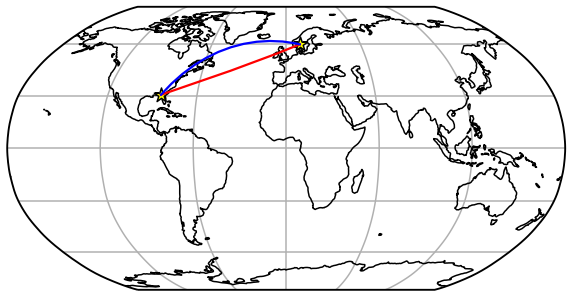

In [42]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson()) 
# note the added argument "projection" informing matplotlib to use the named projection

ax.set_global()
ax.coastlines(zorder=1)
ax.gridlines(zorder=0) # zorder controls the layering that features are drawn, with smaller numbers below larger ones

ax.scatter([-84.3,11],[30.5,60],marker='*',color='yellow',edgecolor='k',s=15**2, transform=ccrs.PlateCarree())

ax.plot([-84.3,11],[30.5,60],color='red',transform=ccrs.PlateCarree());
ax.plot([-84.3,11],[30.5,60],color='blue',transform=ccrs.Geodetic());

See how the blue line has an arc shape -- this is the same reason flight paths tend towards these high-latitudes.

Cartopy also has some pretty built in backgrounds.

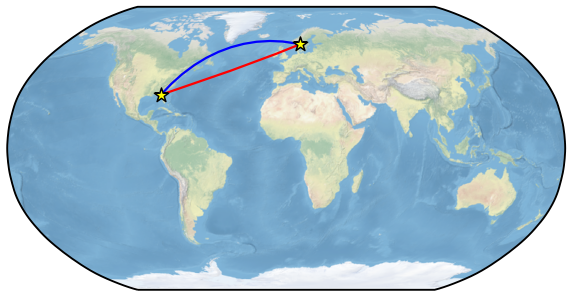

In [43]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson()) 
# note the added argument "projection" informing matplotlib to use the named projection

ax.set_global()
ax.stock_img()
# ax.coastlines(zorder=1)
# ax.gridlines(zorder=0) # zorder controls the layering that features are drawn, with smaller numbers below larger ones

ax.scatter([-84.3,11],[30.5,60],marker='*',color='yellow',edgecolor='k',s=15**2, 
           transform=ccrs.PlateCarree(),zorder=99)

ax.plot([-84.3,11],[30.5,60],color='red',transform=ccrs.PlateCarree());
ax.plot([-84.3,11],[30.5,60],color='blue',transform=ccrs.Geodetic());

We can also change the extents of the plot if we want to limit the area shown.

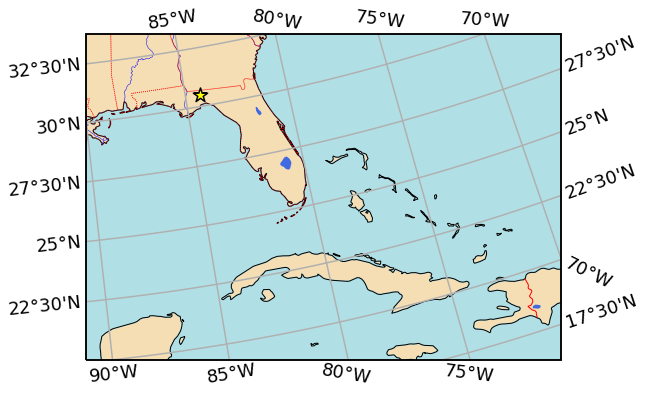

In [44]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1,projection=ccrs.LambertConformal(central_longitude=260, central_latitude=33)) 

ax.set_extent([-90, -70, 20, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE,color='black',linewidth=1)
ax.add_feature(cfeature.BORDERS,color='red',linewidth=1,linestyle='-')
ax.add_feature(cfeature.RIVERS,color='blue',linewidth=0.5)
ax.add_feature(cfeature.LAKES,color='royalblue')
ax.add_feature(cfeature.LAND,color='wheat')
ax.add_feature(cfeature.OCEAN,color='powderblue')
ax.add_feature(cfeature.STATES,edgecolor='red',linewidth=0.75,linestyle=':')

ax.scatter([-84.3,11],[30.5,60],marker='*',color='yellow',edgecolor='k',s=15**2, 
           transform=ccrs.PlateCarree(),zorder=99)

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

## Plotting a rotation

Let's do something fun. We'll import a shapefile for the Indian craton I stole from GPlates, and we can rotate it back to a starting origin.

In [45]:
india = np.loadtxt(fpath+'/Datasets/india_outline.txt')

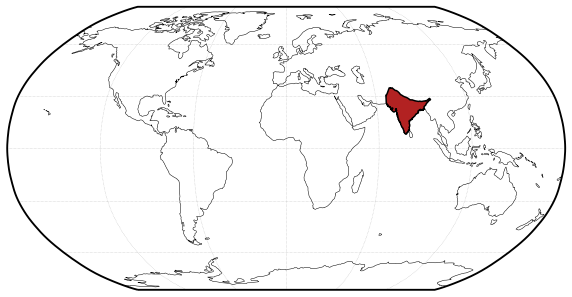

In [46]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson()) 
# note the added argument "projection" informing matplotlib to use the named projection

ax.set_global()
ax.coastlines(linewidth=0.5)
ax.gridlines(zorder=0,linewidth=0.5,linestyle=':') # zorder controls the layering that features are drawn, with smaller numbers below larger ones

ax.fill(india[:,0],india[:,1],color='firebrick',edgecolor='black',transform=ccrs.PlateCarree());

Okay, we need a finite rotation function, which I've copied from Cox and Hart:

In [47]:
def cart_dir(x,y,z):
    """
    converts cartesian to spherical coords
    """
    lon = np.arctan2(y,x)
    lat = np.arcsin(z)
    m = np.sqrt(x**2 + y**2 + z**2)
    
    return np.rad2deg(lon),np.rad2deg(lat),m

def dir_cart(lon,lat):
    """
    converts spherical coords (Degrees) to cartesian
    """
    rlon = np.deg2rad(lon)
    rlat = np.deg2rad(lat)
    
    x = np.cos(rlat)*np.cos(rlon)
    y = np.cos(rlat)*np.sin(rlon)
    z = np.sin(rlat)
    
    return x,y,z

def rotation(slon,slat,elon,elat,ang):
    """
    returns rotated lat, lon for given starting site, euler pole and angle
    """

    ss = dir_cart(slon,slat)
    ee = dir_cart(elon,elat)
    ar = np.radians(ang)
    
    r11 = ee[0]*ee[0]*(1-np.cos(ar))+np.cos(ar)
    r12 = ee[0]*ee[1]*(1-np.cos(ar))-ee[2]*np.sin(ar)
    r13 = ee[0]*ee[2]*(1-np.cos(ar))+ee[1]*np.sin(ar)
    
    r21 = ee[1]*ee[0]*(1-np.cos(ar))+ee[2]*np.sin(ar)
    r22 = ee[1]*ee[1]*(1-np.cos(ar))+np.cos(ar)
    r23 = ee[1]*ee[2]*(1-np.cos(ar))-ee[0]*np.sin(ar)
    
    r31 = ee[2]*ee[0]*(1-np.cos(ar))-ee[1]*np.sin(ar)
    r32 = ee[2]*ee[1]*(1-np.cos(ar))+ee[0]*np.sin(ar)
    r33 = ee[2]*ee[2]*(1-np.cos(ar))+np.cos(ar)
    
    apx = r11*ss[0] + r12*ss[1] + r13*ss[2]
    apy = r21*ss[0] + r22*ss[1] + r23*ss[2]
    apz = r31*ss[0] + r32*ss[1] + r33*ss[2]
    
    (slonp,slatp,_) = cart_dir(apx,apy,apz)
    
    return slonp,slatp

In [48]:
# nominal starting and stopping locations for india
ind0 = dir_cart(80,22)
ind1 = dir_cart(55,-25)

# use cross product to find euler pole
eind = np.cross(ind0,ind1)
eind = eind/np.linalg.norm(eind)

eind = cart_dir(*eind)

# get angle between starting/end points using dot product
ang = np.degrees(np.arccos(np.dot(ind0,ind1)/(np.linalg.norm(ind0)*np.linalg.norm(ind0))))

In [49]:
# calculate new positions for all points in the india shape
ind_anc = np.array([rotation(lon,lat,eind[0],eind[1],ang) for lon,lat in zip(india[:,0],india[:,1])])

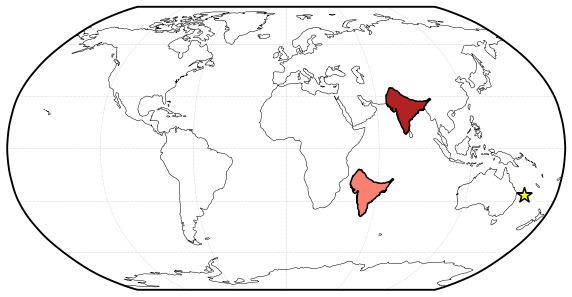

In [50]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson()) 
# note the added argument "projection" informing matplotlib to use the named projection

ax.set_global()
ax.coastlines(linewidth=0.5)
ax.gridlines(zorder=0,linewidth=0.5,linestyle=':') # zorder controls the layering that features are drawn, with smaller numbers below larger ones

ax.scatter(eind[0],eind[1],s=250,color='yellow',marker='*',edgecolor='k',transform=ccrs.PlateCarree())

ax.fill(india[:,0],india[:,1],color='firebrick',edgecolor='black',transform=ccrs.PlateCarree())
ax.fill(ind_anc[:,0],ind_anc[:,1],color='salmon',edgecolor='black',transform=ccrs.PlateCarree());